In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy

## 1)

In [2]:
file_path = 'flight_satisfaction.csv'
columns_to_keep = ['Gender', 'Type of Travel', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Seat comfort', 'Leg room service', 'Baggage handling', 'satisfaction']
df = pd.read_csv(file_path, usecols=columns_to_keep)

In [3]:
print(df.head())

   Gender   Type of Travel  Flight Distance  Inflight wifi service  \
0    Male  Personal Travel              460                      3   
1    Male  Business travel              235                      3   
2  Female  Business travel             1142                      2   
3  Female  Business travel              562                      2   
4    Male  Business travel              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Seat comfort  Leg room service  Baggage handling             satisfaction  
0             5          

In [4]:
columns_to_drop = ['Gender', 'Type of Travel']
df.drop(columns_to_drop, axis=1, inplace=True)

In [5]:
print(df.head())

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  Gate location  Seat comfort  Leg room service  \
0                       3              1             5                 3   
1                       3              3             1                 5   
2                       2              2             5                 3   
3                       5              5             2                 5   
4                       3              3             5                 4   

   Baggage handling             satisfaction  
0              

## 2)

In [6]:
# Detect missing values
missing_data = df.isnull().sum() 
# Drop rows with any missing values
df.dropna(inplace=True)
# Fill missing values with a mean
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


In [7]:
# Detect duplicate rows
duplicate_rows = df[df.duplicated()]
# Remove duplicates
df.drop_duplicates(inplace=True)

In [8]:
column_name = 'Flight Distance'

Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]
# Define upper and lower limits for outliers
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [9]:
# Remove outliers based on IQR
df = df[~((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))]

In [10]:
# Apply a transformation (e.g., capping, log transformation) to mitigate outliers
df[column_name] = np.where(df[column_name] > upper_limit, upper_limit, df[column_name])

## 3)

In [11]:
print(df.columns)

Index(['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Seat comfort', 'Leg room service', 'Baggage handling',
       'satisfaction'],
      dtype='object')


In [12]:
print(df['satisfaction'].unique())

# Replace 'neutral' or 'dissatisfied' with 0, and 'satisfied' with 1
df['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})

# Check unique values again to verify the changes
print(df['satisfaction'].unique())

['neutral or dissatisfied' 'satisfied']
[0 1]


## 4)

In [13]:
def train_test_split(X, y, test_size=0.2, random_state=None):

    if random_state is not None:
        np.random.seed(random_state)

    num_samples = len(X)
    test_samples = int(test_size * num_samples)

    # Shuffle indices
    indices = np.random.permutation(num_samples)

    # Split the indices into training and test sets
    test_indices = indices[:test_samples]
    train_indices = indices[test_samples:]

    # Convert indices to integer values
    train_indices = train_indices.astype(int)
    test_indices = test_indices.astype(int)

    # Split the data based on the indices
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    return X_train, X_test, y_train, y_test

In [14]:
df_2000 = df.sample(n=2000, random_state=42)

X_2000 = df_2000.drop('satisfaction', axis=1) 
y_2000 = df_2000['satisfaction']  

X_train_2000, X_test_2000, y_train_2000, y_test_2000 = train_test_split(X_2000, y_2000, test_size=0.2, random_state=42)

In [15]:
model_2000 = Sequential([
    Dense(64, activation='relu', input_shape=(len(X_train_2000.columns),)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model_2000.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history_2000 = model_2000.fit(X_train_2000, y_train_2000, epochs=500, batch_size=32, validation_data=(X_test_2000, y_test_2000))

Epoch 1/500


50/50 [==============================] - 1s 6ms/step - loss: 7.1198 - accuracy: 0.5181 - val_loss: 2.3313 - val_accuracy: 0.5850
Epoch 2/500
50/50 [==============================] - 0s 3ms/step - loss: 2.0693 - accuracy: 0.5256 - val_loss: 2.4219 - val_accuracy: 0.5850
Epoch 3/500
50/50 [==============================] - 0s 3ms/step - loss: 1.1992 - accuracy: 0.5856 - val_loss: 0.6772 - val_accuracy: 0.6200
Epoch 4/500
50/50 [==============================] - 0s 2ms/step - loss: 1.1376 - accuracy: 0.5569 - val_loss: 1.6021 - val_accuracy: 0.5850
Epoch 5/500
50/50 [==============================] - 0s 2ms/step - loss: 1.7605 - accuracy: 0.5506 - val_loss: 0.8297 - val_accuracy: 0.5750
Epoch 6/500
50/50 [==============================] - 0s 3ms/step - loss: 1.2114 - accuracy: 0.5863 - val_loss: 3.7309 - val_accuracy: 0.5850
Epoch 7/500
50/50 [==============================] - 0s 3ms/step - loss: 1.2118 - accuracy: 0.5987 - val_loss: 0.6351 - val_accuracy: 0.6700
Epoch 8/500

In [17]:
df_5000 = df.sample(n=5000, random_state=42)

X_5000 = df_5000.drop('satisfaction', axis=1) 
y_5000 = df_5000['satisfaction']  

X_train_5000, X_test_5000, y_train_5000, y_test_5000 = train_test_split(X_5000, y_5000, test_size=0.2, random_state=42)

In [18]:
model_5000 = Sequential([
    Dense(64, activation='relu', input_shape=(len(X_train_5000.columns),)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model_5000.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history_5000 = model_5000.fit(X_train_5000, y_train_5000, epochs=500, batch_size=32, validation_data=(X_test_5000, y_test_5000))

Epoch 1/500
125/125 [==============================] - 2s 5ms/step - loss: 7.4033 - accuracy: 0.5100 - val_loss: 1.8084 - val_accuracy: 0.4900
Epoch 2/500
125/125 [==============================] - 0s 3ms/step - loss: 2.5446 - accuracy: 0.5263 - val_loss: 0.7423 - val_accuracy: 0.5910
Epoch 3/500
125/125 [==============================] - 0s 4ms/step - loss: 1.2108 - accuracy: 0.5822 - val_loss: 0.7001 - val_accuracy: 0.5960
Epoch 4/500
125/125 [==============================] - 0s 4ms/step - loss: 1.4472 - accuracy: 0.5663 - val_loss: 6.6143 - val_accuracy: 0.5970
Epoch 5/500
125/125 [==============================] - 0s 4ms/step - loss: 1.4111 - accuracy: 0.5698 - val_loss: 0.6042 - val_accuracy: 0.6930
Epoch 6/500
125/125 [==============================] - 0s 4ms/step - loss: 1.3684 - accuracy: 0.5638 - val_loss: 1.7455 - val_accuracy: 0.5960
Epoch 7/500
125/125 [==============================] - 0s 4ms/step - loss: 2.3482 - accuracy: 0.5425 - val_loss: 0.9715 - val_accuracy: 0.5920

In [20]:
# Evaluate the models
results_2000 = model_2000.evaluate(X_test_2000, y_test_2000)
results_5000 = model_5000.evaluate(X_test_5000, y_test_5000)

print("Results for 2000 rows:")
print(f"Loss: {results_2000[0]}, Accuracy: {results_2000[1]}")

print("\nResults for 5000 rows:")
print(f"Loss: {results_5000[0]}, Accuracy: {results_5000[1]}")


32/32 [==============================] - 0s 3ms/step - loss: 0.2715 - accuracy: 0.8830
Results for 2000 rows:
Loss: 0.45324352383613586, Accuracy: 0.762499988079071

Results for 5000 rows:
Loss: 0.27149027585983276, Accuracy: 0.8830000162124634


c:\Users\User\miniconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


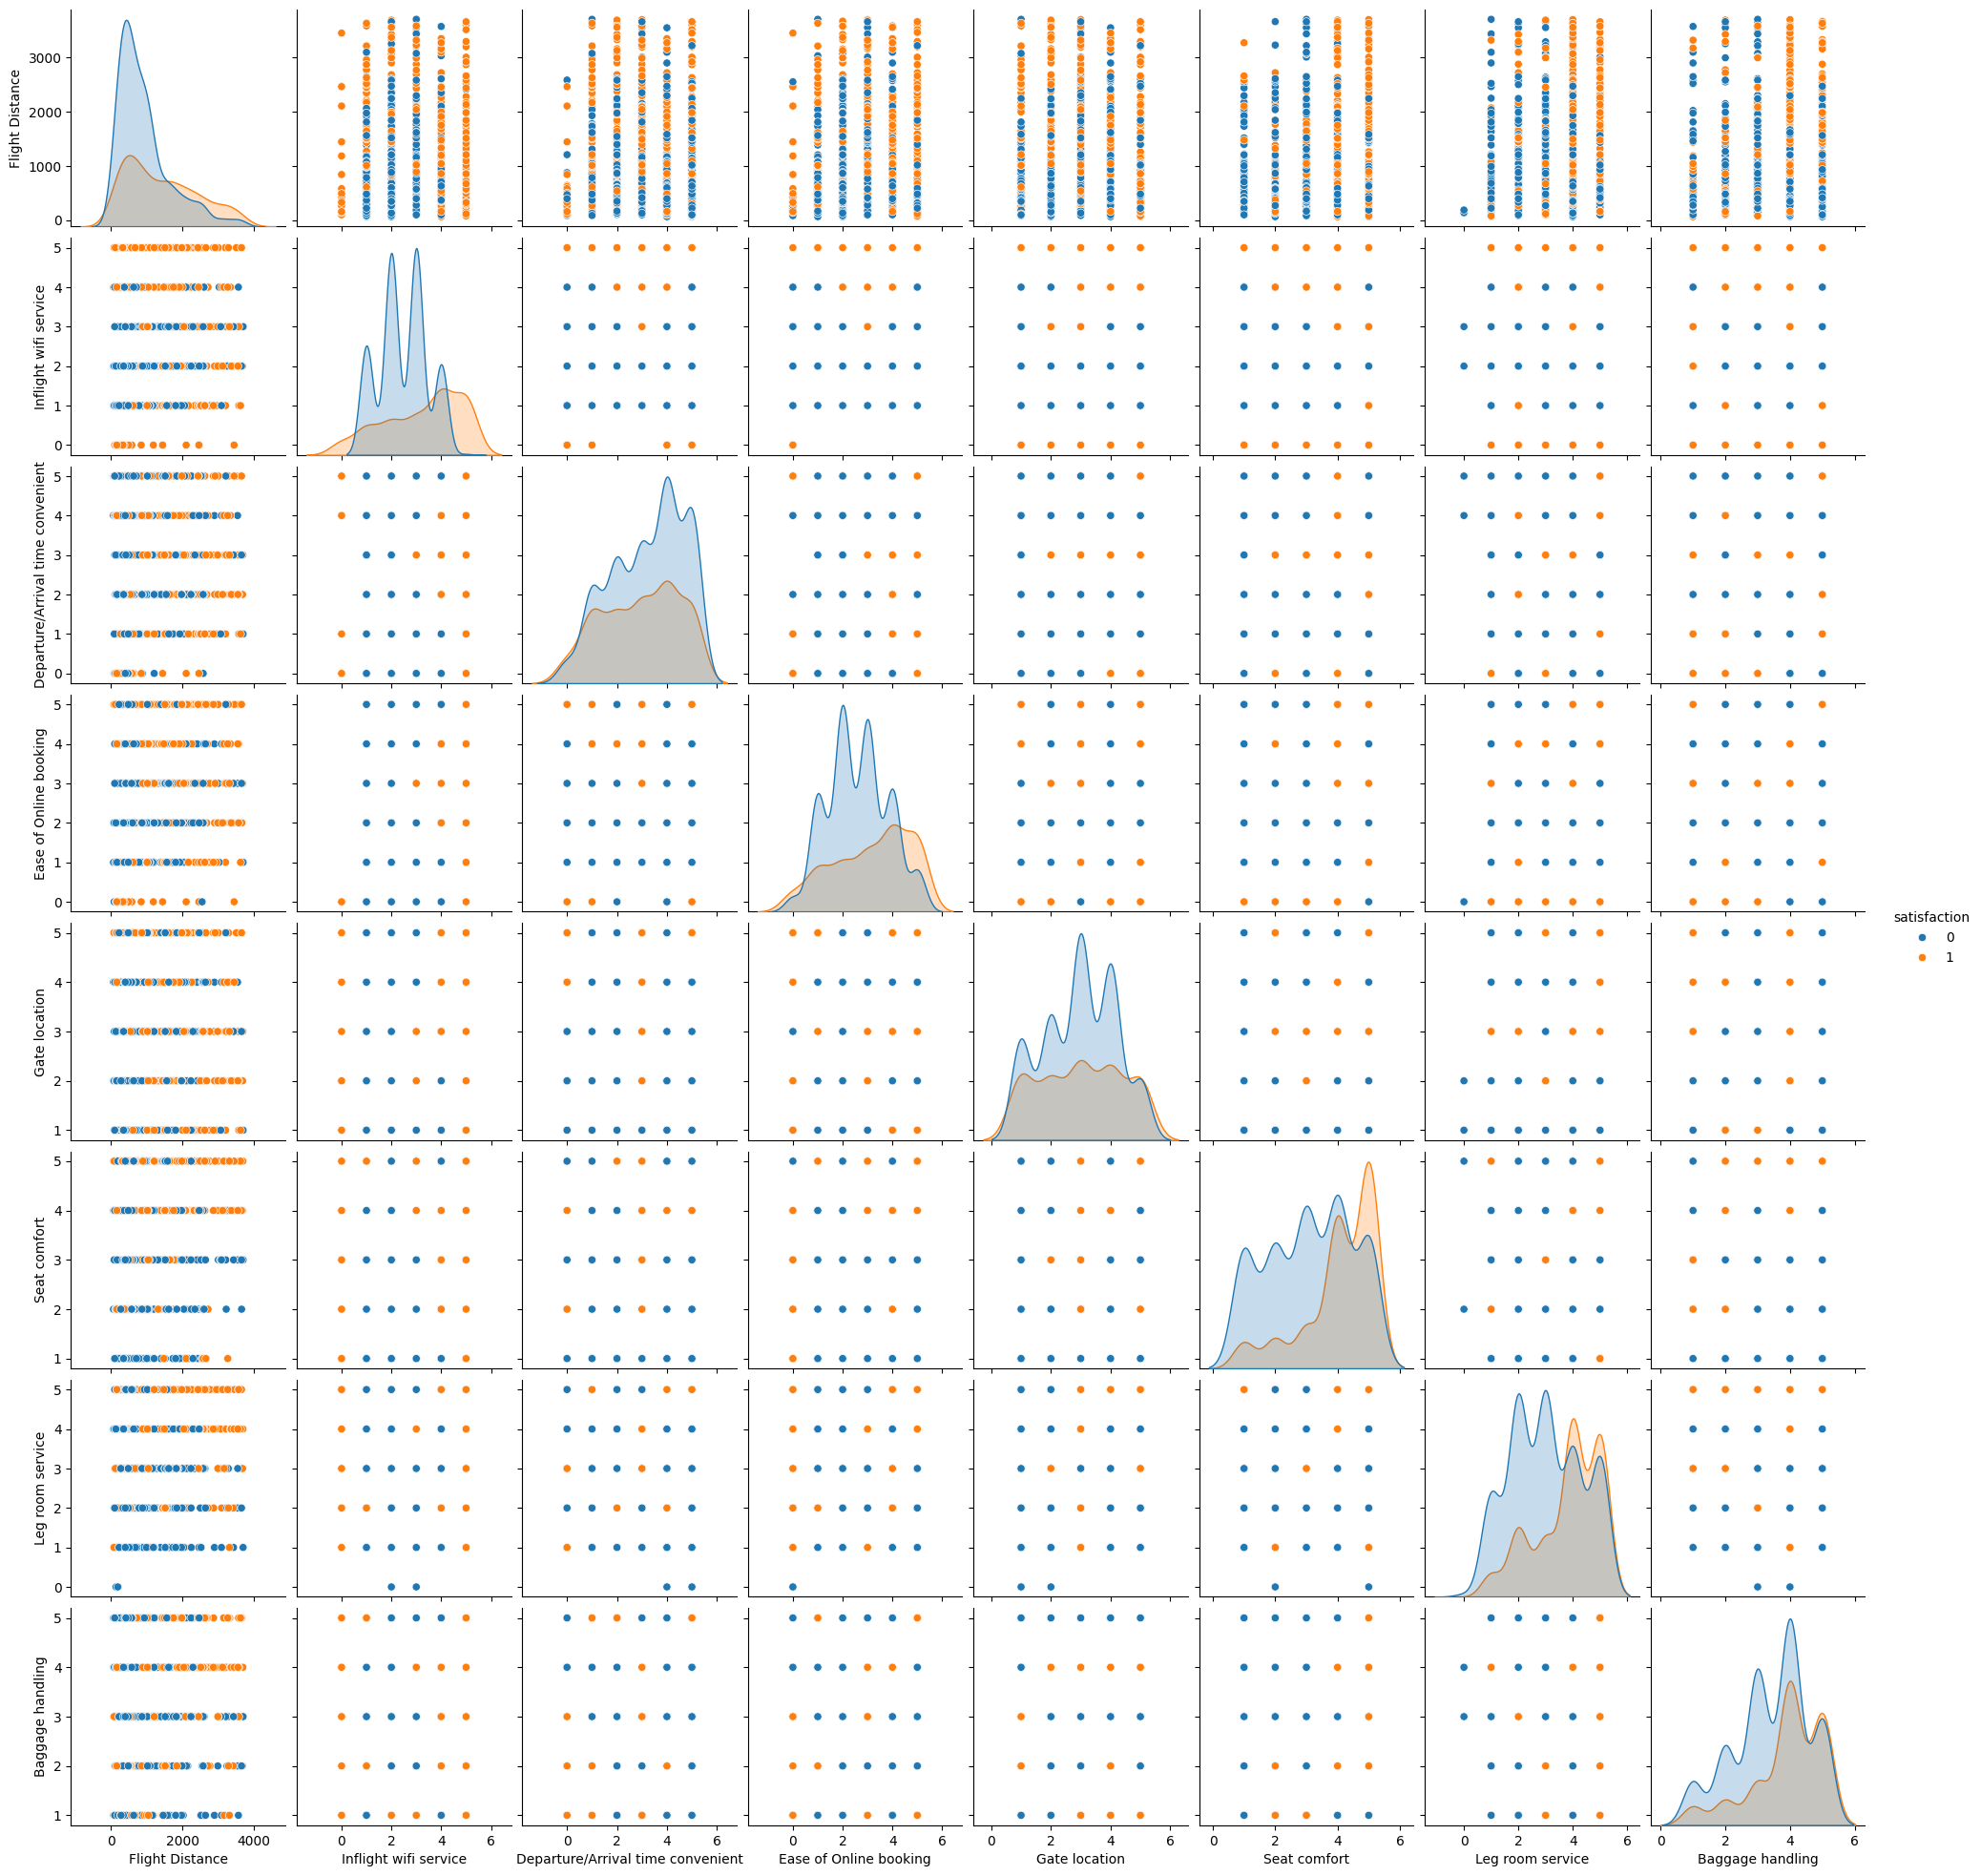

In [22]:

sampled_data_for_visualization = df.sample(n=1000, random_state=42)

# Create a pairplot
sns.pairplot(sampled_data_for_visualization, hue='satisfaction')

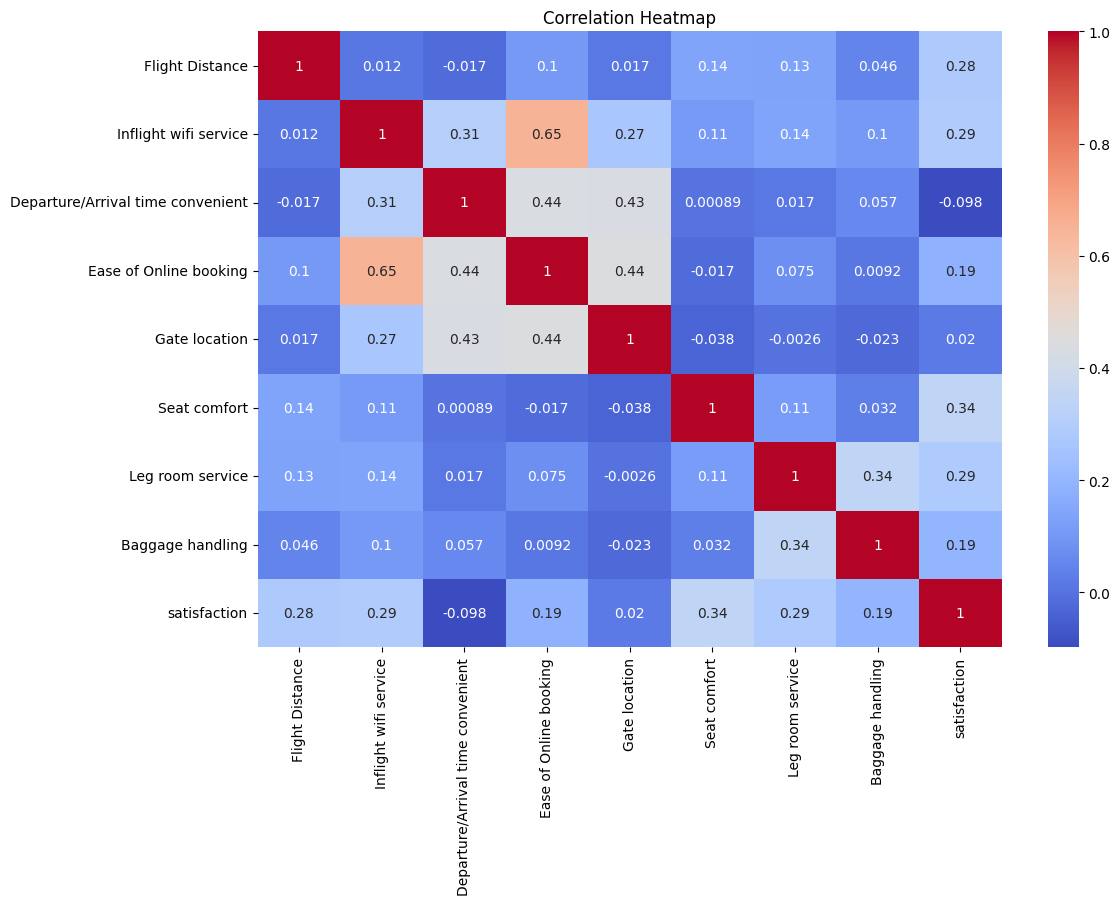

In [23]:
correlation_matrix = sampled_data_for_visualization.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## entropy)

In [24]:
def mutual_information(feature, target):
    # Create a contingency table for the two variables
    contingency = pd.crosstab(feature, target)

    # Calculate individual entropies
    feature_entropy = entropy(feature.value_counts(normalize=True), base=2)
    target_entropy = entropy(target.value_counts(normalize=True), base=2)

    # Calculate joint entropy
    joint_entropy = entropy(contingency.values.flatten(), base=2)

    # Calculate mutual information
    mutual_info = feature_entropy + target_entropy - joint_entropy
    return mutual_info

# Assuming X_train_5000 contains your training feature data and y_train_5000 contains the target variable
feature_info_gain = []

for column in X_train_5000.columns:
    info_gain = mutual_information(X_train_5000[column], y_train_5000)
    feature_info_gain.append((column, info_gain))

# Create a DataFrame to associate feature names with their mutual information scores
feature_info_gain_df = pd.DataFrame(feature_info_gain, columns=['Feature', 'InfoGain'])

# Sort features by information gain in descending order
sorted_features_info_gain = feature_info_gain_df.sort_values(by='InfoGain', ascending=False)

# Display sorted features by information gain
print(sorted_features_info_gain)


                             Feature  InfoGain
0                    Flight Distance  0.411179
1              Inflight wifi service  0.232517
5                       Seat comfort  0.091400
3             Ease of Online booking  0.075806
6                   Leg room service  0.065461
7                   Baggage handling  0.049066
4                      Gate location  0.013421
2  Departure/Arrival time convenient  0.001861


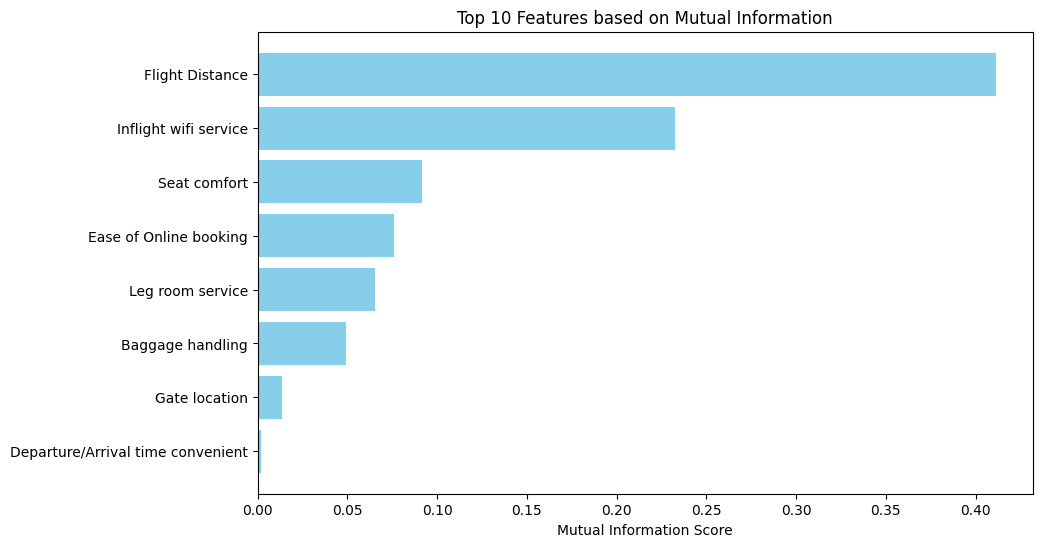

In [25]:
top_n = 10 
top_features = sorted_features_info_gain.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['InfoGain'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title(f'Top {top_n} Features based on Mutual Information')
plt.gca().invert_yaxis() 
plt.show()